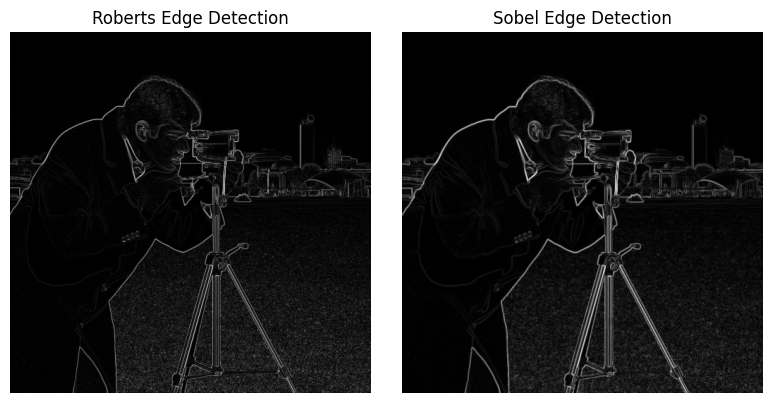

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images


image = camera()
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

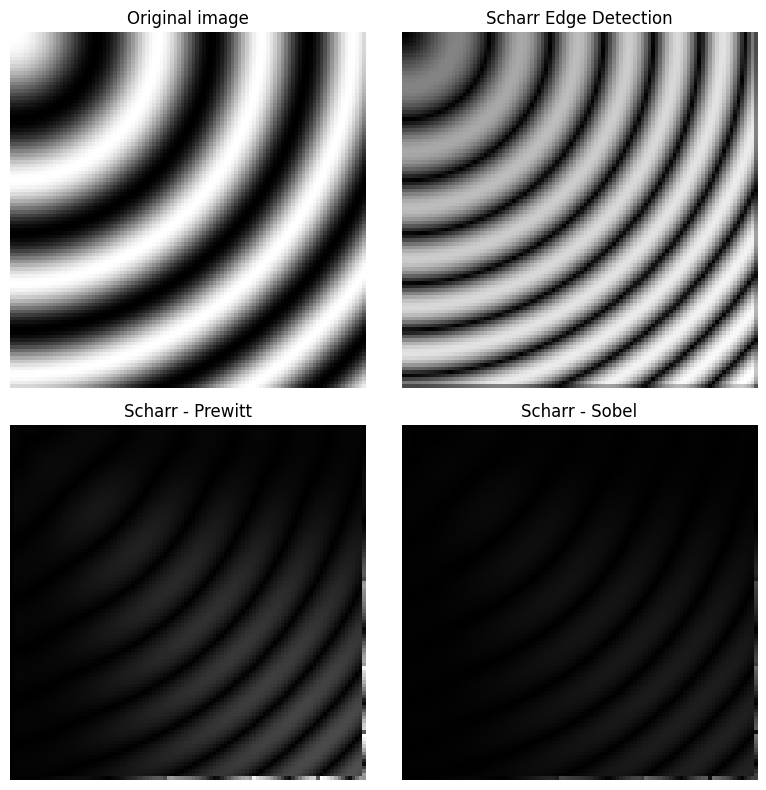

In [2]:
x, y = np.ogrid[:100, :100]

# Creating a rotation-invariant image with different spatial frequencies.
image_rot = np.exp(1j * np.hypot(x, y) ** 1.3 / 20.0).real

edge_sobel = filters.sobel(image_rot)
edge_scharr = filters.scharr(image_rot)
edge_prewitt = filters.prewitt(image_rot)

diff_scharr_prewitt = compare_images(edge_scharr, edge_prewitt)
diff_scharr_sobel = compare_images(edge_scharr, edge_sobel)
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 8))
axes = axes.ravel()

axes[0].imshow(image_rot, cmap=plt.cm.gray)
axes[0].set_title('Original image')

axes[1].imshow(edge_scharr, cmap=plt.cm.gray)
axes[1].set_title('Scharr Edge Detection')

axes[2].imshow(diff_scharr_prewitt, cmap=plt.cm.gray, vmax=max_diff)
axes[2].set_title('Scharr - Prewitt')

axes[3].imshow(diff_scharr_sobel, cmap=plt.cm.gray, vmax=max_diff)
axes[3].set_title('Scharr - Sobel')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

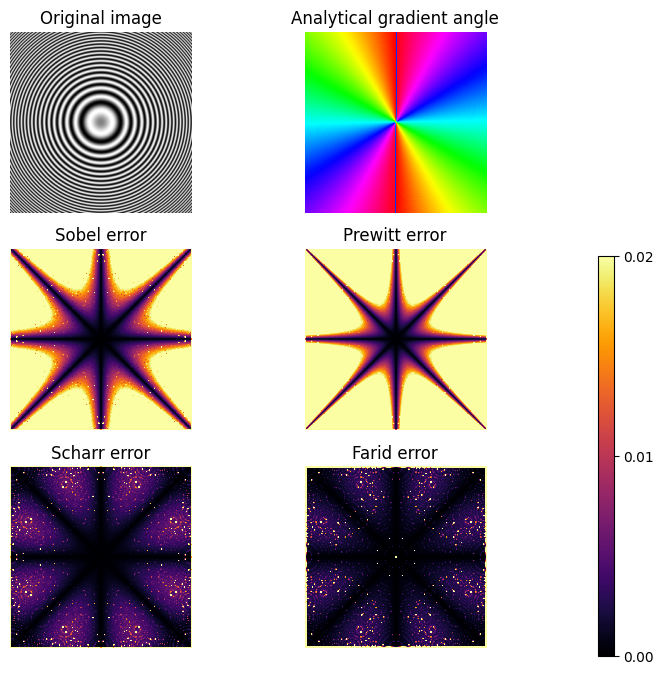

In [3]:
x, y = np.mgrid[-10:10:255j, -10:10:255j]
image_rotinv = np.sin(x**2 + y**2)

image_x = 2 * x * np.cos(x**2 + y**2)
image_y = 2 * y * np.cos(x**2 + y**2)


def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)


true_angle = angle(image_x, image_y)

angle_farid = angle(filters.farid_h(image_rotinv), filters.farid_v(image_rotinv))
angle_sobel = angle(filters.sobel_h(image_rotinv), filters.sobel_v(image_rotinv))
angle_scharr = angle(filters.scharr_h(image_rotinv), filters.scharr_v(image_rotinv))
angle_prewitt = angle(filters.prewitt_h(image_rotinv), filters.prewitt_v(image_rotinv))


def diff_angle(angle_1, angle_2):
    """Calculate the differences between two angles."""
    return np.minimum(np.pi - np.abs(angle_1 - angle_2), np.abs(angle_1 - angle_2))


diff_farid = diff_angle(true_angle, angle_farid)
diff_sobel = diff_angle(true_angle, angle_sobel)
diff_scharr = diff_angle(true_angle, angle_scharr)
diff_prewitt = diff_angle(true_angle, angle_prewitt)

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(8, 8))
axes = axes.ravel()

axes[0].imshow(image_rotinv, cmap=plt.cm.gray)
axes[0].set_title('Original image')

axes[1].imshow(true_angle, cmap=plt.cm.hsv)
axes[1].set_title('Analytical gradient angle')

axes[2].imshow(diff_sobel, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
axes[2].set_title('Sobel error')

axes[3].imshow(diff_prewitt, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
axes[3].set_title('Prewitt error')

axes[4].imshow(diff_scharr, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
axes[4].set_title('Scharr error')

color_ax = axes[5].imshow(diff_farid, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
axes[5].set_title('Farid error')

fig.subplots_adjust(right=0.8)
colorbar_ax = fig.add_axes([0.90, 0.10, 0.02, 0.50])
fig.colorbar(color_ax, cax=colorbar_ax, ticks=[0, 0.01, 0.02])

for ax in axes:
    ax.axis('off')

plt.show()